<a id='Вступление'></a>
<font color=blue>

## Вступление
 
---
     
Целью данной работы является анализ данных стартапа в области продажи продуктов, изучение воронки продаж и выяснение доли пользователей, которые доходят до покупки. Кроме того задача данной работы - исследование результатов А/A/B-эксперимента, чтобы узнать удастся ли с применением новых шрифтов в дизайне приложения повлиять на увеличение доли пользователей дошедших до покупки.  
    
Данные предствлены в Таблице **logs_exp** со следующими столбцами:
 
 - EventName — название события, далее переименовано в "event";
 - DeviceIDHash — уникальный идентификатор пользователя, далее переименовано в "uid" ;
 - EventTimestamp — время события, далее переименовано в "event_timestamp";
 - ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная, далее переименовано в "group".
   
   Каждая запись в логе — это действие пользователя, или событие.
 
Для решения поставленных задач планирую применить методы, которые были освоены в процесссе прохождения курса  "Принятие решений в бизнесе на основе данных", а также ранее методы. освоенные в других ранее пройденных спринтах.
 
</font> 

In [11]:
import pandas as pd
import numpy as np
from scipy import stats as st
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)  
pd.options.display.max_colwidth = 150  
import math as mth
 


## Оглавление

### [Вступление](#Вступление)

### <a href='#1'>Шаг 1. Откройте файл с данными и изучите общую информацию. </a>

### <a href='#2'>Шаг №2. Подготовьте данные.</a>

 - #### <a href='#3'>Замените названия столбцов на удобные для вас; Проверьте пропуски и типы данных. Откорректируйте, если нужно; Добавьте столбец даты и времени, а также отдельный столбец дат; </a> 
 
### <a href='#6'>Шаг 3. Изучите и проверьте данные</a>  
 - #### <a href='#4'>Сколько всего событий в логе?</a>  
 - #### <a href='#5'>Сколько всего пользователей в логе?</a>
 - #### <a href='#6'>Сколько в среднем событий приходится на пользователя?</a> 
 - #### <a href='#7'>Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?</a> 
 - #### <a href='#8'>Много ли событий и пользователей вы потеряли, отбросив старые данные?</a> 
 - #### <a href='#9'>Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.</a> 
     
### <a href='#10'>Шаг 4. Изучите воронку событий</a>
 - #### <a href='#11'>Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.</a> 
 - #### <a href='#12'>Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.</a>
 - #### <a href='#13'>Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.</a>
 - #### <a href='#14'>По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.</a>
 - #### <a href='#15'>На каком шаге теряете больше всего пользователей?</a>
 - #### <a href='#16'>Какая доля пользователей доходит от первого события до оплаты?</a>
### <a href='#17'>Шаг 5. Изучите результаты эксперимента</a>
 - #### <a href='#18'>Сколько пользователей в каждой экспериментальной группе?</a>
 - #### <a href='#19'>Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.</a>
 - #### <a href='#20'>Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?</a>
 - #### <a href='#21'>Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?</a>
 - #### <a href='#22'>Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.</a>
### <a href='#23'>Общие выводы</a>
 
 
 

 














<a id='1'></a>

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [142]:
#logs_exp = pd.read_csv('/datasets/logs_exp.csv', sep='\t')
logs_exp = pd.read_csv('logs_exp.csv', sep='\t')
logs_exp

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [143]:
logs_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [144]:
logs_exp.EventTimestamp.count()

244126

In [145]:
logs_exp.EventName.value_counts() 

MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: EventName, dtype: int64

In [146]:
logs_exp['DeviceIDHash'].nunique()

7551

In [147]:
logs_exp['EventName'].unique()

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

<font color=blue>

### Вывод  
Открыли таблицу. В таблице 6 столбцов и 244126 строк, 7551 уникальных пользователкй, 6 событий и 3 эксперементальных группы.
 
</font> 

<a id='2'></a>

## Шаг 2. Подготовьте данные

<a id='3'></a>
### Замените названия столбцов на удобные для вас;
### Проверьте пропуски и типы данных. Откорректируйте, если нужно;
### Добавьте столбец даты и времени, а также отдельный столбец дат;

In [148]:
# Заменим названия столбцов на удобные для нас;
logs_exp.set_axis(['event', 'uid', 'event_timestamp', 'group' ], axis = 'columns', inplace = True)
logs_exp

,event,uid,event_timestamp,group
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [149]:
# Добавим столбец даты и времени
logs_exp['datetime'] = pd.to_datetime(logs_exp['event_timestamp'], unit='s')  
logs_exp





,event,uid,event_timestamp,group,datetime
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58


In [150]:
logs_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event            244126 non-null  object        
 1   uid              244126 non-null  int64         
 2   event_timestamp  244126 non-null  int64         
 3   group            244126 non-null  int64         
 4   datetime         244126 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 9.3+ MB


In [151]:
# Добавим отдельный столбец дат;
logs_exp['date']  =  logs_exp['datetime'].dt.date 
logs_exp

,event,uid,event_timestamp,group,datetime,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


In [152]:
# Проверим наличие пропусков
logs_exp.isnull().sum()

 

event              0
uid                0
event_timestamp    0
group              0
datetime           0
date               0
dtype: int64

In [153]:
# Проверим наличие дубкликатов
logs_exp.duplicated().sum() 

413

In [154]:
logs_exp[logs_exp.duplicated()==True].count()

event              413
uid                413
event_timestamp    413
group              413
datetime           413
date               413
dtype: int64

In [155]:
#  Удаляем дубликаты в столбцах методом drop_duplicates.

logs_exp.drop_duplicates(inplace = True)


In [156]:

logs_exp.duplicated().sum()

0

<font color=blue>

### Вывод  
Заменили названия столбцов на удобные.
Выполнили предобработку. Проверилили на наличие пропусков. Удалили дубликаты. Изменили типы данных (даты). Откорректируйте, Добавили столбец даты и времени и столбец дат.
 
</font> 

<a id='3'></a>

## Шаг 3. Изучите и проверьте данные 

<a id='4'></a>
### Сколько всего событий в логе?

In [157]:
logs_exp.event.value_counts()

MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: event, dtype: int64

In [158]:
logs_exp.event.count()

243713

<a id='5'></a>
### Сколько всего пользователей в логе?

In [159]:
logs_exp.head()

,event,uid,event_timestamp,group,datetime,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


In [160]:
logs_exp.head(50)


,event,uid,event_timestamp,group,datetime,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
5,CartScreenAppear,6217807653094995999,1564055323,248,2019-07-25 11:48:43,2019-07-25
6,OffersScreenAppear,8351860793733343758,1564066242,246,2019-07-25 14:50:42,2019-07-25
7,MainScreenAppear,5682100281902512875,1564085677,246,2019-07-25 20:14:37,2019-07-25
8,MainScreenAppear,1850981295691852772,1564086702,247,2019-07-25 20:31:42,2019-07-25
9,MainScreenAppear,5407636962369102641,1564112112,246,2019-07-26 03:35:12,2019-07-26


In [161]:
logs_exp.uid.nunique()

7551

<a id='6'></a>
### Сколько в среднем событий приходится на пользователя?

In [167]:
event_per_uid = logs_exp.groupby('uid')['event'].count().mean()
event_per_uid

32.27559263673685


<font color=blue>

### Вывод  
    

В логе всего 243713 события. 

В логе всего 7551 уникальных пользователя.
 
На кажлго пользователя в среднем приходится 32 события. 
 
</font> 







<a id='7'></a>
### Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?

In [168]:
logs_exp.datetime.min()

Timestamp('2019-07-25 04:43:36')

In [169]:
logs_exp.datetime.max()

Timestamp('2019-08-07 21:15:17')

In [170]:
logs_exp.head()

,event,uid,event_timestamp,group,datetime,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


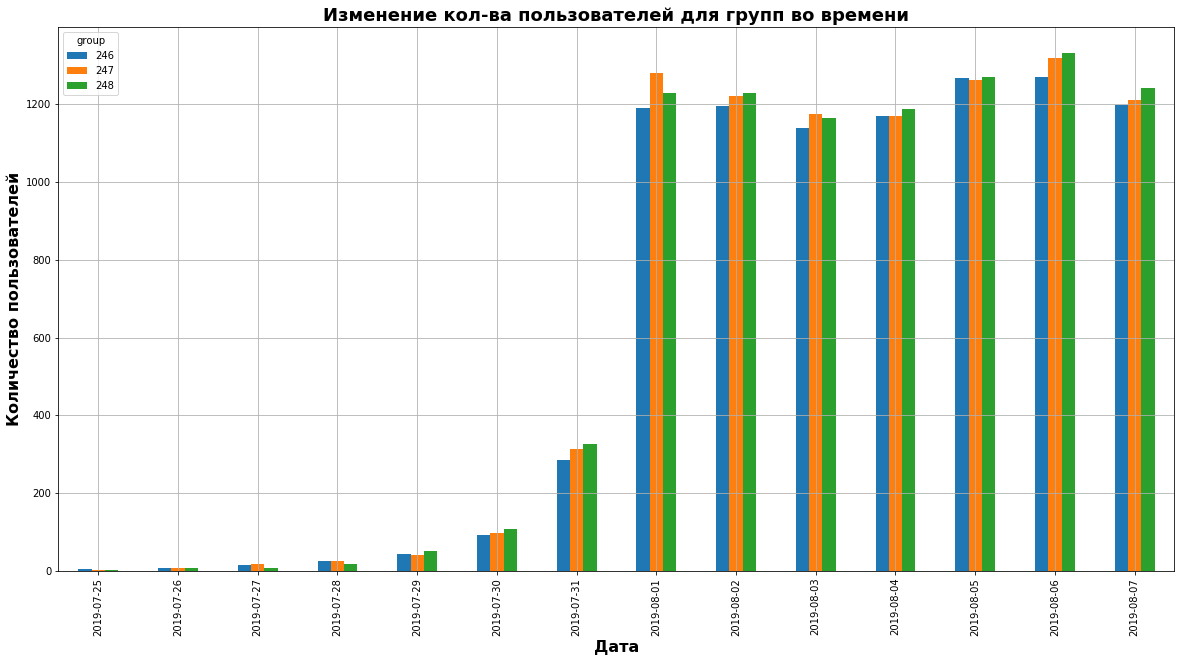

In [171]:
uid_daily = logs_exp.pivot_table(index='date', columns='group', values='uid', aggfunc='nunique')
uid_daily.plot(grid=True, kind='bar', figsize=(20, 10))
plt.xlabel("Дата", fontsize=16, fontweight="bold")
plt.ylabel("Количество пользователей", fontsize=16, fontweight="bold")
plt.title("Изменение кол-ва пользователей для групп во времени", fontsize=18, fontweight="bold");

 

''

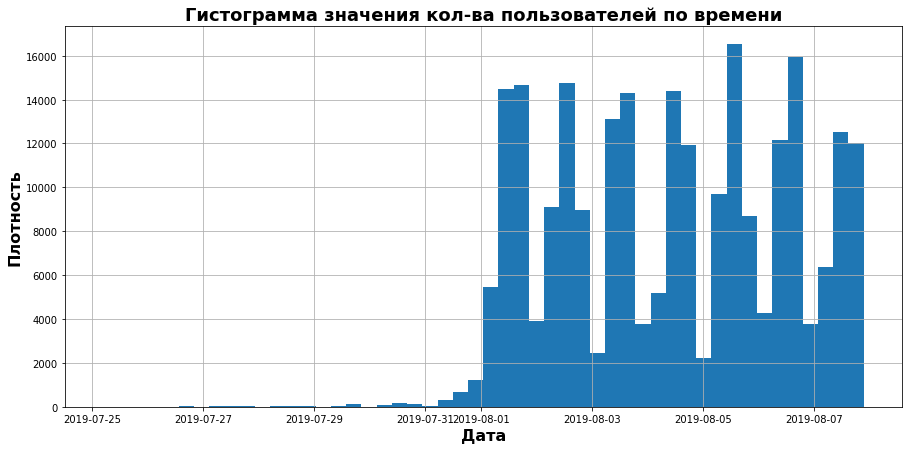

In [172]:
logs_exp.datetime.hist(bins=50, figsize=(15,7))
#uid_daily.plot(grid=True, kind='bar', figsize=(20, 10))
plt.xlabel("Дата", fontsize=16, fontweight="bold")
plt.ylabel("Плотность", fontsize=16, fontweight="bold")
plt.title('Гистограмма значения кол-ва пользователей по времени', fontsize=18, fontweight="bold");


;

In [173]:
logs_exp_old = logs_exp[logs_exp['datetime'] < '2019-07-31 23:59:59']

In [174]:
logs_exp_old.shape

(2825, 6)


<font color=blue>

### Вывод  
    
Мы располагаем данными с 25 июля 2019 по 7 августа 2019 г.
Построил барплот и гистограмму. Принял решение, что отброшу данные до 01 августа. Считаю данные с 01 августа полными. Об этом можно судить по вывденным графикам. Располагаю на самом деле данными за период времени с 01 августа по 7 августа 2019 г.
     
 
</font> 



<a id='8'></a>
### Много ли событий и пользователей вы потеряли, отбросив старые данные?

In [175]:
logs_exp_old.event.count()

2825

In [176]:
logs_exp_old.tail(50)

,event,uid,event_timestamp,group,datetime,date
2777,OffersScreenAppear,2712290788139738557,1564614997,247,2019-07-31 23:16:37,2019-07-31
2778,MainScreenAppear,1534051565705796373,1564615244,247,2019-07-31 23:20:44,2019-07-31
2779,MainScreenAppear,1615677818169862243,1564615261,247,2019-07-31 23:21:01,2019-07-31
2780,MainScreenAppear,1615677818169862243,1564615301,247,2019-07-31 23:21:41,2019-07-31
2781,OffersScreenAppear,1615677818169862243,1564615304,247,2019-07-31 23:21:44,2019-07-31
2782,MainScreenAppear,3467224126427330032,1564615338,246,2019-07-31 23:22:18,2019-07-31
2783,MainScreenAppear,735251485903965518,1564615381,248,2019-07-31 23:23:01,2019-07-31
2784,MainScreenAppear,3467224126427330032,1564615471,246,2019-07-31 23:24:31,2019-07-31
2785,MainScreenAppear,735251485903965518,1564615532,248,2019-07-31 23:25:32,2019-07-31
2786,MainScreenAppear,8003284968498909777,1564615567,247,2019-07-31 23:26:07,2019-07-31


In [177]:
logs_exp_old.event_timestamp.count()

2825

In [178]:
logs_exp_old.uid.nunique()


1451

In [179]:
logs_exp_old.groupby('event')['uid'].count()

event
CartScreenAppear            365
MainScreenAppear           1772
OffersScreenAppear          475
PaymentScreenSuccessful     200
Tutorial                     13
Name: uid, dtype: int64


<font color=blue>

### Вывод  
    
Из первоначачальных 244126 событий мы потеряли 2825 событий, то есть немногим более 1 процента.
Но практически не потеряли ни одного пользователя. В очищенный датасет не попало всего 17 пользователей.
     
 
</font> 


In [180]:
logs_exp_new = logs_exp[logs_exp['datetime'] > '2019-07-31 23:59:59']

In [181]:
logs_exp_new_uids = logs_exp_new['uid'].unique()
 

In [182]:
logs_exp_new_uids
logs_exp_old_uids_not_in_logs_exp_new = logs_exp_old.query('uid not in @logs_exp_new_uids')
logs_exp_old_uids_not_in_logs_exp_new.uid.nunique()

17

<a id='9'></a>
### Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

In [183]:
logs_exp_new.head()

,event,uid,event_timestamp,group,datetime,date
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01


In [184]:
logs_exp_new.groupby('group')['uid'].count()

group
246    79302
247    77022
248    84563
Name: uid, dtype: int64

In [185]:
logs_exp_new['uid'].count()

240887


<font color=blue>

### Вывод 
    
Убедился, что у нас есть пользователи из всех трёх экспериментальных групп.
 
 
</font> 

<a id='10'></a>


## Шаг 4. Изучите воронку событий

<a id='11'></a>
### Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.

In [186]:
logs_exp_new.event.head(20)

2828                   Tutorial
2829           MainScreenAppear
2830           MainScreenAppear
2831         OffersScreenAppear
2832           MainScreenAppear
2833           MainScreenAppear
2834         OffersScreenAppear
2835           MainScreenAppear
2836           MainScreenAppear
2837           MainScreenAppear
2838           MainScreenAppear
2839         OffersScreenAppear
2840           MainScreenAppear
2841                   Tutorial
2842           MainScreenAppear
2843         OffersScreenAppear
2844           MainScreenAppear
2845           MainScreenAppear
2846           CartScreenAppear
2847    PaymentScreenSuccessful
Name: event, dtype: object

In [187]:
logs_exp_new.event.value_counts()

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event, dtype: int64

<a id='12'></a>
### Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.

In [188]:
uids_per_event = logs_exp_new.groupby('event')['uid'].nunique().sort_values(ascending=True).reset_index()
uids_per_event.columns = ['event', 'uid']
uids_per_event

,event,uid
0,Tutorial,840
1,PaymentScreenSuccessful,3539
2,CartScreenAppear,3734
3,OffersScreenAppear,4593
4,MainScreenAppear,7419


In [189]:

uids_with_events_total = logs_exp_new.groupby('event')['uid'].nunique().sum()
uids_with_events_total

20125

In [190]:
uids_per_event['share'] = (uids_per_event['uid'] / uids_with_events_total).round(2)
uids_per_event.columns = ['event', 'uids_count', 'share']
uids_per_event

,event,uids_count,share
0,Tutorial,840,0.04
1,PaymentScreenSuccessful,3539,0.18
2,CartScreenAppear,3734,0.19
3,OffersScreenAppear,4593,0.23
4,MainScreenAppear,7419,0.37


In [191]:
uids_with_events_total_corr = logs_exp_new['uid'].nunique()
uids_with_events_total_corr

7534

In [192]:
uids_per_event_corr = logs_exp_new.groupby('event')['uid'].nunique().sort_values(ascending=True).reset_index()
uids_per_event_corr.columns = ['event', 'uid']
uids_per_event_corr

,event,uid
0,Tutorial,840
1,PaymentScreenSuccessful,3539
2,CartScreenAppear,3734
3,OffersScreenAppear,4593
4,MainScreenAppear,7419


In [193]:
uids_per_event_corr['share'] = (uids_per_event_corr['uid'] / uids_with_events_total_corr).round(2)
uids_per_event.columns = ['event', 'uids_count', 'share']
uids_per_event_corr 

,event,uid,share
0,Tutorial,840,0.11
1,PaymentScreenSuccessful,3539,0.47
2,CartScreenAppear,3734,0.50
3,OffersScreenAppear,4593,0.61
4,MainScreenAppear,7419,0.98


<p style="background:purple">
<code style="background:purple;color:white">
Расчеты исправил.
</code>
</p>

<a id='13'></a>
### Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.

In [194]:
logs_exp_new.event.unique()

array(['Tutorial', 'MainScreenAppear', 'OffersScreenAppear',
       'CartScreenAppear', 'PaymentScreenSuccessful'], dtype=object)

####  MainScreenAppear  → OffersScreenAppear  → CartScreenAppear  → PaymentScreenSuccessful

In [195]:
logs_exp_updated = logs_exp_new.query('event != "Tutorial"')
logs_exp_updated

,event,uid,event_timestamp,group,datetime,date
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
2833,MainScreenAppear,4899590676214355127,1564618215,247,2019-08-01 00:10:15,2019-08-01
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


<a id='14'></a>
### По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.

In [196]:
logs_exp_updated.event.unique()

array(['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear',
       'PaymentScreenSuccessful'], dtype=object)

#### MainScreenAppear - OffersScreenAppear - CartScreenAppear - PaymentScreenSuccessful

In [197]:
uids_count_by_events_grouped = logs_exp_updated.groupby('event')['uid'].nunique().sort_values(ascending=True).reset_index()
uids_count_by_events_grouped

,event,uid
0,PaymentScreenSuccessful,3539
1,CartScreenAppear,3734
2,OffersScreenAppear,4593
3,MainScreenAppear,7419


In [198]:
CartScreenAppear_to_OffersScreenAppear_conversion = 3734 / 4593    
CartScreenAppear_to_OffersScreenAppear_conversion

0.8129762682342695

In [199]:
PaymentScreenSuccessful_to_CartScreenAppear_conversion = 3539 / 3734   
PaymentScreenSuccessful_to_CartScreenAppear_conversion

0.9477771826459561

In [200]:
def conversion_calc(event_1, event_2):
    conversion = round(uids_count_by_events_grouped \
.loc[uids_count_by_events_grouped['event'] ==  event_1, 'uid'].values[0] / uids_count_by_events_grouped \
.loc[uids_count_by_events_grouped['event'] ==  event_2, 'uid'].values[0], 2)
    print('Конверcия', event_1, '/',  event_2 )
    print('Конверсия ', conversion)
    

In [201]:
conversion_calc('CartScreenAppear', 'OffersScreenAppear')

Конверcия CartScreenAppear / OffersScreenAppear
Конверсия  0.81


In [202]:
conversion_calc('PaymentScreenSuccessful', 'CartScreenAppear')

Конверcия PaymentScreenSuccessful / CartScreenAppear
Конверсия  0.95


<a id='15'></a>
### На каком шаге теряете больше всего пользователей?




<font color=blue>

#### Теряем больше всего пользователей при переходе от OffersScreenAppear к PaymentScreenSuccessful
 
 
</font> 

<a id='16'></a>
### Какая доля пользователей доходит от первого события до оплаты?

In [203]:
PaymentScreenSuccessful_to_MainScreenAppear_conversion = (3539 / 7410 )
round(PaymentScreenSuccessful_to_MainScreenAppear_conversion, 2)

0.48


<font color=blue>

## Вывод
    
    
Определил какие события есть в логах и как часто они встречаются. Чаще всего встречается MainScreenAppear а реже всего Tutorial     

Посчитал, сколько пользователей совершали каждое из этих событий.
    
Посчитал долю пользователей, которые хоть раз совершали событие.
    
Предполагаю, что события происходят в следующем порядке:  
**MainScreenAppear  → OffersScreenAppear  → CartScreenAppear  → PaymentScreenSuccessful**

Событие tutorial не "вписывается" в цепочку. Не будем учитывать это событие.
      
По воронке событий посчитал доля пользователей, которая проходит на следующий шаг воронки.
    
Больше всего пользователей мы теряем при переходе от OffersScreenAppear к PaymentScreenSuccessful. Видимо это самый решающий этап.
   
От первого события до оплаты доходит 48% пользователей.    
 
 
</font> 


<a id='17'></a>

## Шаг 5. Изучите результаты эксперимента

<a id='18'></a>
### Сколько пользователей в каждой экспериментальной группе?

In [204]:
users_per_group = logs_exp_new.groupby('group')['uid'].nunique().reset_index()

users_per_group.columns = ['group', 'users_count']
users_per_group

,group,users_count
0,246,2484
1,247,2513
2,248,2537


<a id='19'></a>
### Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.

In [205]:
logs_exp_updated.head()

,event,uid,event_timestamp,group,datetime,date
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
2833,MainScreenAppear,4899590676214355127,1564618215,247,2019-08-01 00:10:15,2019-08-01


In [206]:
user_group = logs_exp_updated.groupby(['uid']).agg({'group': 'nunique'}).reset_index()
user_group.columns = ['uid', 'groups_count']
user_group

,uid,groups_count
0,6888746892508752,1
1,6909561520679493,1
2,6922444491712477,1
3,7435777799948366,1
4,7702139951469979,1
...,...,...
7525,9217594193087726423,1
7526,9219463515465815368,1
7527,9220879493065341500,1
7528,9221926045299980007,1


In [207]:
user_group.query('groups_count > 1').shape[0]

0

In [208]:
for group_one in users_per_group['group']:
    for group_two in users_per_group['group']:
        if (group_one == group_two):
            continue
        else:
            difference = ((users_per_group[users_per_group['group'] == group_one]['users_count'].iloc[0] 
            / users_per_group[users_per_group['group'] == group_two]['users_count'].iloc[0] - 1) * 100).round(2)
        print(group_one, group_two, difference)    

246 247 -1.15
246 248 -2.09
247 246 1.17
247 248 -0.95
248 246 2.13
248 247 0.96


In [209]:
two_four_six = logs_exp_updated.query('group == "246"')
two_four_six.head()

,event,uid,event_timestamp,group,datetime,date
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2834,OffersScreenAppear,3737462046622621720,1564618226,246,2019-08-01 00:10:26,2019-08-01
2835,MainScreenAppear,3737462046622621720,1564618247,246,2019-08-01 00:10:47,2019-08-01


In [210]:
two_four_six_users_per_day = two_four_six.groupby('date')['uid'].count()

In [211]:
two_four_six_users_per_day

date
2019-08-01    11504
2019-08-02    10880
2019-08-03    10526
2019-08-04    11472
2019-08-05    12337
2019-08-06    11680
2019-08-07    10586
Name: uid, dtype: int64

In [212]:
two_four_six_users_per_day_values = two_four_six_users_per_day.values
two_four_six_users_per_day_values

array([11504, 10880, 10526, 11472, 12337, 11680, 10586], dtype=int64)

In [213]:
two_four_seven = logs_exp_updated.query('group == "247"')
two_four_seven.head()

,event,uid,event_timestamp,group,datetime,date
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
2833,MainScreenAppear,4899590676214355127,1564618215,247,2019-08-01 00:10:15,2019-08-01
2838,MainScreenAppear,4899590676214355127,1564618288,247,2019-08-01 00:11:28,2019-08-01
2839,OffersScreenAppear,4899590676214355127,1564618290,247,2019-08-01 00:11:30,2019-08-01
2843,OffersScreenAppear,4899590676214355127,1564618356,247,2019-08-01 00:12:36,2019-08-01


In [214]:
two_four_seven_users_per_day = two_four_seven.groupby('date')['uid'].count()
two_four_seven_users_per_day

date
2019-08-01    12226
2019-08-02    10946
2019-08-03    10968
2019-08-04     9898
2019-08-05    10892
2019-08-06    11682
2019-08-07    10072
Name: uid, dtype: int64

In [215]:
two_four_seven_users_per_day_values = two_four_seven_users_per_day.values
two_four_seven_users_per_day_values

array([12226, 10946, 10968,  9898, 10892, 11682, 10072], dtype=int64)

In [216]:
# Сделаем также срез данных по группе 248. Она пригодится нам в следущих пунктах.
two_four_eight = logs_exp_updated.query('group == "248"')


<font color=blue>

Сформулируем нулевую гипотезу следующим образом:

**Между контрольным группами 246 и 247 нет статистически значимого различия значений среднего количества пользователей в день.**

И сформулируем альтернативную гипотезу следующим образом:
    
**Средние значения количества пользователей у двух контрольных групп 246 и 247 различаются.**
    
        
</font>

In [217]:
two_four_six_users_per_day_values

array([11504, 10880, 10526, 11472, 12337, 11680, 10586], dtype=int64)

In [218]:
two_four_seven_users_per_day_values

array([12226, 10946, 10968,  9898, 10892, 11682, 10072], dtype=int64)

In [219]:
two_four_six_users_per_day_values_variance = np.var(two_four_six_users_per_day_values)
two_four_six_users_per_day_values_variance

367764.53061224485

In [220]:
two_four_seven_users_per_day_values_variance = np.var(two_four_seven_users_per_day_values)
two_four_seven_users_per_day_values_variance

577875.2653061224

In [221]:
alpha = 0.05

results = st.ttest_ind(
    two_four_six_users_per_day_values, 
    two_four_seven_users_per_day_values, equal_var = False) 

print('p-значение:', results.pvalue)
#print('p-значение: {:.20f}'.format(results.pvalue)) 

if  results.pvalue < alpha: # ваш код: сравните получившееся p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4246128557783624
Не получилось отвергнуть нулевую гипотезу


<font color=blue>

### Вывод
    
Проверил количество пользователей в каждой экспериментальной группе. Различие не превышает чуть более 2 %.
    
Проверили статистистичскими методами 2 контрольные группы 246 и 247 для А/А-эксперимента.
    
Проверенные статистические критерии свидетельствуют о том, что между между контрольными выборками 246 и 247 разницы нет.       
     
</font>

<a id='20'></a>
### Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?

In [222]:
two_four_six.head()

,event,uid,event_timestamp,group,datetime,date
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2834,OffersScreenAppear,3737462046622621720,1564618226,246,2019-08-01 00:10:26,2019-08-01
2835,MainScreenAppear,3737462046622621720,1564618247,246,2019-08-01 00:10:47,2019-08-01


In [223]:
two_four_six.groupby('event')['uid'].nunique().sort_values()

event
PaymentScreenSuccessful    1200
CartScreenAppear           1266
OffersScreenAppear         1542
MainScreenAppear           2450
Name: uid, dtype: int64

In [224]:
two_four_six_count = two_four_six.groupby('event')['uid'].nunique().sort_values().reset_index()
two_four_six_count  

,event,uid
0,PaymentScreenSuccessful,1200
1,CartScreenAppear,1266
2,OffersScreenAppear,1542
3,MainScreenAppear,2450


In [225]:
two_four_seven_count = two_four_seven.groupby('event')['uid'].nunique().sort_values().reset_index()
two_four_seven_count

,event,uid
0,PaymentScreenSuccessful,1158
1,CartScreenAppear,1238
2,OffersScreenAppear,1520
3,MainScreenAppear,2476


In [226]:
two_four_eight_count = two_four_eight.groupby('event')['uid'].nunique().sort_values().reset_index()
two_four_eight_count

,event,uid
0,PaymentScreenSuccessful,1181
1,CartScreenAppear,1230
2,OffersScreenAppear,1531
3,MainScreenAppear,2493



<font color=blue>
Согласно одной из формулировок центральной предельной теоремы при оценке среднего значения генеральной совокупности выборочные средние нормально распределены вокруг среднего всей совокупности независимо от того, как распределена сама генеральная совокупность. А если некоторая доля генеральной совокупности обладает признаком, а другая её часть — нет, об этой доле можно судить по выборке из генеральной совокупности. 
В нашем случае о том будут ли  отличия между группами статистически достоверным будем судить по разнице между пропорциями, наблюдаемыми на выборках. Решим задачу сравнения пропорций двух генеральных совокупностей по выборкам из них. 
 

</font>

<font color=blue>

Сформулируем нулевую гипотезу следующим образом:

**Между долями числа пользователей, совершивших популярное событие в каждой из контрольных групп нет статистически значимой разницы.**
    
        
</font>

<font color=blue>
 
Сформулируем альтернативную гипотезу следующим образом:
    
**Между долями числа пользователей, совершивших популярное событие в каждой из контрольных групп есть статистически значимая разница.**

</font>


<font color=blue>
 
Попытаемся опровергнуть нулевую гипотезу для контрольных групп для доли пользователей совершивших самое поопулярное событие, 
а именно  **MainScreenAppear**
</font>




  
<font color=blue>

Прверим также будут ли также достоверными статистически отличия между контрольными группами для других событий. 
    
Автоматизируем проверку.      
     
</font>

In [227]:
logs_exp_updated.head()

,event,uid,event_timestamp,group,datetime,date
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
2833,MainScreenAppear,4899590676214355127,1564618215,247,2019-08-01 00:10:15,2019-08-01


In [228]:
df_group = logs_exp_updated.groupby(['group'])['uid'].nunique().reset_index()
df_group

,group,uid
0,246,2483
1,247,2512
2,248,2535


In [229]:
df_group = logs_exp_updated.groupby(['group'])['uid'].nunique().reset_index()
df_group

,group,uid
0,246,2483
1,247,2512
2,248,2535


In [230]:
two_four_six_and_two_four_seven = logs_exp_updated.query('group != "248"')
two_four_six_and_two_four_seven.head()

,event,uid,event_timestamp,group,datetime,date
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
2833,MainScreenAppear,4899590676214355127,1564618215,247,2019-08-01 00:10:15,2019-08-01


In [231]:
df_group.loc[3] =  [246247, df_group.uid[0] + df_group.uid[1]]
df_group

,group,uid
0,246,2483
1,247,2512
2,248,2535
3,246247,4995


In [232]:
def hypo_checker(alpha,                                  # критический уровень статистической значимости
                 hypothesis_number,                      # количество прверяемых гипотез
                 data_group_1,                           # данные по первой группе
                 data_group_2,                           # данные по второй группе
                 group_1,                                # обозначение группы 1
                 group_2,                                # обозначение группы 2
                 event_successes):                       # совершившееся событие
 
    hypothesis_number =  hypothesis_number
    
    bonferroni_alpha = alpha / hypothesis_number 
 
        # группа 1
    count_group_1 = (df_group.loc[df_group['group'] == group_1,                  
                                                     'uid'].values[0])               
    successes_group_1 = (data_group_1.loc[data_group_1['event'] == event_successes, 
                                                     'uid'].values[0])
        # группа 2
    count_group_2 = (df_group.loc[df_group['group'] == group_2,                   
                                                     'uid'].values[0])                
    successes_group_2 = (data_group_2.loc[data_group_2['event'] == event_successes, 
                                                     'uid'].values[0])
        # пропорция успехов в группе 1:
    p1 = successes_group_1 / count_group_1
 
        # пропорция успехов в группе 2:
    p2 = successes_group_2 / count_group_2
 
        # пропорция успехов в комбинированном датасете:
    p_combined = (successes_group_1 + successes_group_2) / (count_group_1 + count_group_2)
 
        # разница пропорций в датасетах
    difference = p1 - p2
 
        # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/count_group_1 + 1/count_group_2))
 
        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1) 
 
    p_value = (1 - distr.cdf(abs(z_value))) * 2
 
    print('p-значение:', p_value)
 
    if (p_value < bonferroni_alpha):
        print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

In [233]:
logs_exp_updated.event.unique()

array(['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear',
       'PaymentScreenSuccessful'], dtype=object)

<font color=blue>

Попытаемся опровергнуть нулевую гипотезу для контрольных групп для доли пользователей совершивших событие **MainScreenAppear**

 
        
</font>

In [234]:
hypo_checker(0.05, 4, two_four_six_count, two_four_seven_count, 246, 247, 'MainScreenAppear')

p-значение: 0.7526703436483038
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


<font color=blue>

Попытаемся опровергнуть нулевую гипотезу для контрольных групп для доли пользователей совершивших событие **CartScreenAppear**

 
        
</font>

In [235]:
hypo_checker(0.05, 4, two_four_six_count, two_four_seven_count, 246, 247, 'CartScreenAppear')

p-значение: 0.22867643757335676
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


<font color=blue>

Попытаемся опровергнуть нулевую гипотезу для контрольных групп для доли пользователей совершивших событие **PaymentScreenSuccessful**

 
        
</font> 

In [236]:
hypo_checker(0.05, 4, two_four_six_count, two_four_seven_count, 246, 247, 'PaymentScreenSuccessful')

p-значение: 0.11446627829276612
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


<a id='21'></a>

### Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?


<font color=blue>

Попытаемся опровергнуть нулевую гипотезу для эскпериментальной группы 248 с контрольной группой 246 доли пользователей совершивших событие **MainScreenAppear**

 
        
</font>

In [237]:
hypo_checker(0.05, 12, two_four_six_count, two_four_eight_count, 246, 248, 'MainScreenAppear')


p-значение: 0.3387114076159288
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


<font color=blue>

Попытаемся опровергнуть нулевую гипотезу для эскпериментальной группы 248 с контрольной группой 246 для доли пользователей, совершивших событие **OffersScreenAppear**

       
</font> 

In [238]:
hypo_checker(0.05, 12, two_four_six_count, two_four_eight_count, 246, 248, 'OffersScreenAppear')

p-значение: 0.21442476639710506
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


<font color=blue>

Попытаемся опровергнуть нулевую гипотезу для эскпериментальной группы 248 с контрольной группой 246 для доли пользователей, совершивших событие **CartScreenAppear**

       
</font> 

In [239]:
hypo_checker(0.05, 12, two_four_six_count, two_four_eight_count, 246, 248, 'CartScreenAppear')

p-значение: 0.08067367598823139
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


<font color=blue>

Попытаемся опровергнуть нулевую гипотезу для эскпериментальной группы **248** с контрольной группой **246** для доли пользователей, совершивших событие **PaymentScreenSuccessful**

       
</font> 

In [240]:
hypo_checker(0.05, 12, two_four_six_count, two_four_eight_count, 246, 248, 'PaymentScreenSuccessful')

p-значение: 0.21693033984516674
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


<font color=blue>

Попытаемся опровергнуть нулевую гипотезу для эскпериментальной группы 248 с контрольной группой 247 доли пользователей совершивших событие **MainScreenAppear**

 
        
</font>

In [241]:
hypo_checker(0.05, 12, two_four_seven_count, two_four_eight_count, 247, 248, 'MainScreenAppear')


p-значение: 0.5194964354051703
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


<font color=blue>

Попытаемся опровергнуть нулевую гипотезу для эскпериментальной группы **248** с контрольной группой **247** для доли пользователей, совершивших событие **OffersScreenAppear**

       
</font> 

In [242]:
hypo_checker(0.05, 12, two_four_seven_count, two_four_eight_count, 247, 248, 'OffersScreenAppear')

p-значение: 0.9333751305879443
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


<font color=blue>

Попытаемся опровергнуть нулевую гипотезу для эскпериментальной группы **248** с контрольной группой **247** для доли пользователей, совершивших событие **CartScreenAppear**

       
</font> 

In [243]:
hypo_checker(0.05, 12, two_four_seven_count, two_four_eight_count, 247, 248, 'CartScreenAppear')

p-значение: 0.5878284605111943
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


<font color=blue>

Попытаемся опровергнуть нулевую гипотезу для эскпериментальной группы **248** с контрольной группой **247** для доли пользователей, совершивших событие **PaymentScreenSuccessful**

       
</font> 

In [244]:
hypo_checker(0.05, 12, two_four_seven_count, two_four_eight_count, 247, 248, 'PaymentScreenSuccessful')

p-значение: 0.7275718682261119
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [245]:
two_four_six_and_two_four_seven = logs_exp_updated.query('group != "248"')
two_four_six_and_two_four_seven.head(10)

,event,uid,event_timestamp,group,datetime,date
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
2833,MainScreenAppear,4899590676214355127,1564618215,247,2019-08-01 00:10:15,2019-08-01
2834,OffersScreenAppear,3737462046622621720,1564618226,246,2019-08-01 00:10:26,2019-08-01
2835,MainScreenAppear,3737462046622621720,1564618247,246,2019-08-01 00:10:47,2019-08-01
2836,MainScreenAppear,3737462046622621720,1564618270,246,2019-08-01 00:11:10,2019-08-01
2837,MainScreenAppear,3737462046622621720,1564618280,246,2019-08-01 00:11:20,2019-08-01
2838,MainScreenAppear,4899590676214355127,1564618288,247,2019-08-01 00:11:28,2019-08-01


In [246]:
two_four_six_and_two_four_seven_count = two_four_six_and_two_four_seven.groupby('event')['uid'].nunique().sort_values().reset_index()
two_four_six_and_two_four_seven_count

,event,uid
0,PaymentScreenSuccessful,2358
1,CartScreenAppear,2504
2,OffersScreenAppear,3062
3,MainScreenAppear,4926


<font color=blue>

Попытаемся опровергнуть нулевую гипотезу для эскпериментальной группы 248 с объединенными контрольными группами 246 и 247 для доли пользователей, совершивших событие MainScreenAppear
        
</font>

In [247]:
hypo_checker(0.05, 12, two_four_six_and_two_four_seven_count, two_four_eight_count, 246247, 248, 'MainScreenAppear')



p-значение: 0.3486684291093256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


<font color=blue>

Попытаемся опровергнуть нулевую гипотезу для эскпериментальной группы 248 с объединенными контрольноыми группами 246 и 247 для доли пользователей, совершивших событие **OffersScreenAppear**

       
</font> 

In [248]:
hypo_checker(0.05, 12, two_four_six_and_two_four_seven_count, two_four_eight_count, 246247, 248, 'OffersScreenAppear')

p-значение: 0.44582745409482394
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


<font color=blue>

Попытаемся опровергнуть нулевую гипотезу для эскпериментальной группы 248  с объединенными контрольноыми группами 246 и 247 для доли пользователей, совершивших событие **CartScreenAppear**

       
</font> 

In [249]:
hypo_checker(0.05, 12, two_four_six_and_two_four_seven_count, two_four_eight_count, 246247, 248, 'CartScreenAppear')

p-значение: 0.18683558686831558
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


<font color=blue>

Попытаемся опровергнуть нулевую гипотезу для эскпериментальной группы **248** с контрольной группой **247** для доли пользователей, совершивших событие **PaymentScreenSuccessful**

       
</font> 

In [250]:
hypo_checker(0.05, 12,  two_four_six_and_two_four_seven_count, two_four_eight_count, 246247, 248, 'PaymentScreenSuccessful')

p-значение: 0.6107918742187335
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


<a id='22'></a>

### Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

<font color=blue>

Первоначально выбрал уровень значимости 0.05. Я выполнил 12 проверок статистическиз гипотез. Учитывая это обстоятельство 
так как при множественных тестах с  каждой новой проверкой гипотезы растёт вероятность ошибки первого родаЭ Чтобы снизить 
вероятность ложнопозитивного результата применим методы корректировки уровня значимости с испоьзованием поправки Бонеферрони.

bonferroni_alpha = alpha / 12   Так как произведено двенацать сравнений.
    
Вернемся в предыдущие пункты и проверим расчеты.

       
</font>


<font color=blue>

## Вывод
    
Выбрал популярное событие и посчитал доли пользователей, совершивших это событие в каждой из контрольных групп. 
Между группами не было выявлено статистически достоверных отличий. 
То же самое было выполнено для других событий.     
Аналогично были проведены проверки между группой с изменённым шрифтом и поочередно с кажой из контрольных групп и в том числе с объединенной контрольной группой.
Также и в этом случае между группами не было выявлено статистически достоверных отличий.   
 
Таким образом можно сделать заключение, что разница между экспериментальными и контроьными группами **не** оказалась значимой.
 
С учетом множественных тестов была применены поправка Бонферрони с тем, чтобы уменьшить вероятность ощибки первого рода. 
 
 
 
</font> 

<a id='23'></a> 

<font color=blue>
    
    
# **Общий вывод**
     
Были исследована таблица с данными мобильного приложения с логами действий пользователя, для стартапа, продающего продукты питания. 
 
Была выполнена предобработка данных. 
    
Были отсечены данные до 01.08.2020, чтобы в логи новых дней по некоторым пользователям не «доезжали» события из прошлого. 
        
Были изучены вопросы и сделаны следующие выводы по **воронке событий**:    

 - Посчитал, сколько пользователей совершали каждое из этих событий.
    
 - Посчитал долю пользователей, которые хоть раз совершали событие.
    
 - Предположил, что события происходят в следующем порядке:  
**MainScreenAppear  → OffersScreenAppear  → CartScreenAppear  → PaymentScreenSuccessful**

 - Событие tutorial не "вписывается" в цепочку. Поэтому мы его не стали учитывать.
      
 - По воронке событий посчитал доли пользователей, которая проходит на следующий шаг воронки.
    
 - Больше всего пользователей мы теряем при переходе от OffersScreenAppear к PaymentScreenSuccessful. Видимо это самый решающий этап.
   
 - От первого события до оплаты доходит 48% пользователей.  

Были изучены вопросы и сделаны следующие выводы по **результатам A/A/B-эксперимента.**:
    
 - Проверил количество пользователей в каждой экспериментальной группе. Различие не превышает чуть более 2 %.
    
 - Проверил статистистичскими методами 2 контрольные группы 246 и 247 для А/А-эксперимента.
    
 - Проверенные статистические критерии свидетельствуют о том, что между между контрольными выборками 246 и 247 разницы нет.  
  
 - Выбрал популярное событие и посчитал доли пользователей, совершивших это событие в каждой из контрольных групп. 
   Между группами не было выявлено статистически достоверных отличий. 

 - То же самое было выполнено для других событий. И также между группами не было выявлено статистически достоверных отличий.     
 - Аналогично были проведены проверки между группой с изменённым шрифтом и поочередно с кажой из контрольных групп и в том   
   числе с объединенной контрольной группой. Также и в этом случае между группами не было выявлено статистически достоверных  
   отличий. 
 - С учетом множественных тестов была применены поапрвка Бонферрони с тем, чтобы уменьшить вероятность ощибки первого рода. 
 
#### Принимая во внимание вышеназванное можем констатировать, что разница между экспериментальными и контролными группами **не** оказалась значимой. 

#### Таким образом рекомендуем менеджерам стартапа оставить "старые" шрифты в млбильном приложении.
                        
</font>
  
    
    
    
    
    
    
